# Explore here

**IMPORTS**

In [43]:
import requests
import pandas as pd
from io import StringIO
import time 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**Carga de datos**

In [4]:
url="https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

respuesta=requests.get(url)

with open('bank-marketing-campaign-data.csv','wb') as archivo:
    archivo.write(respuesta.content)

data = pd.read_csv('bank-marketing-campaign-data.csv', sep=';')

data.head()

#Nota: también puedes leerlo y eliminar comillas, así:
#data = respuesta.text
## Eliminar comillas dobles
#data_no_quotes = data.replace('"', '')
## Leer datos en un DataFrame de pandas
#df = pd.read_csv(StringIO(data_no_quotes), sep=';')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**REALIZAMOS UN EDA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Tenemos 41188 filas y 21 columnas, entre ellas tenemos la variable objetivo "y" que nos indica si el cliente ha contratado o no.

Las variables de tipo numéricas son:

* age
* duration
* campaign
* pdays
* previous             
* emp.var.rate
* cons.price.idx
* cons.conf.idx
* euribor3m
* nr.employed

Las variables de tipo categóricas son:
 
* job  
* marital   
* education 
* default 
* housing 
* loan 
* contact 
* month 
* day_of_week 
* poutcome
* y
        

Vamos a echar un vistazo a las variables

* **Nulos y duplicados**

In [6]:
print(f"El número de duplicados es: {data.duplicated().sum()}")
print(f"El % de nulos es:\n {data.isnull().sum()/len(data)*100}")

El número de duplicados es: 12
El % de nulos es:
 age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


**No hay valores nulos**

Hay **12 filas de duplicados** que vamos a eliminar:

In [7]:
data = data.drop_duplicates()

Vamos a separar las variables numéricas de las categóricas para ir haciendo un pequeño análisis de las mismas, y para posteriormente factorizar las variables categóricas y poder hacer también un análisis cruzado con la variable objetivo.

In [8]:
num_vars=["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
cat_vars=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","y"]
cat_vars_trans=["job_n","marital_n","education_n","default_n","housing_n","loan_n","contact_n","month_n","day_of_week_n","poutcome_n","y_n"]

#Factorizamos las variables categóricas
data[cat_vars_trans] = data[cat_vars].apply(lambda x: pd.factorize(x)[0])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,1,1,0,0,0,0,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,1,0,0,0,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,2,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,1,0,0,1,0,0,0,0,0


In [9]:
data_n=data.drop(cat_vars,axis=1,inplace=False)
data_n.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,1,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,1,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,2,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,0,0,0,0


**Análisis de variables numéricas**

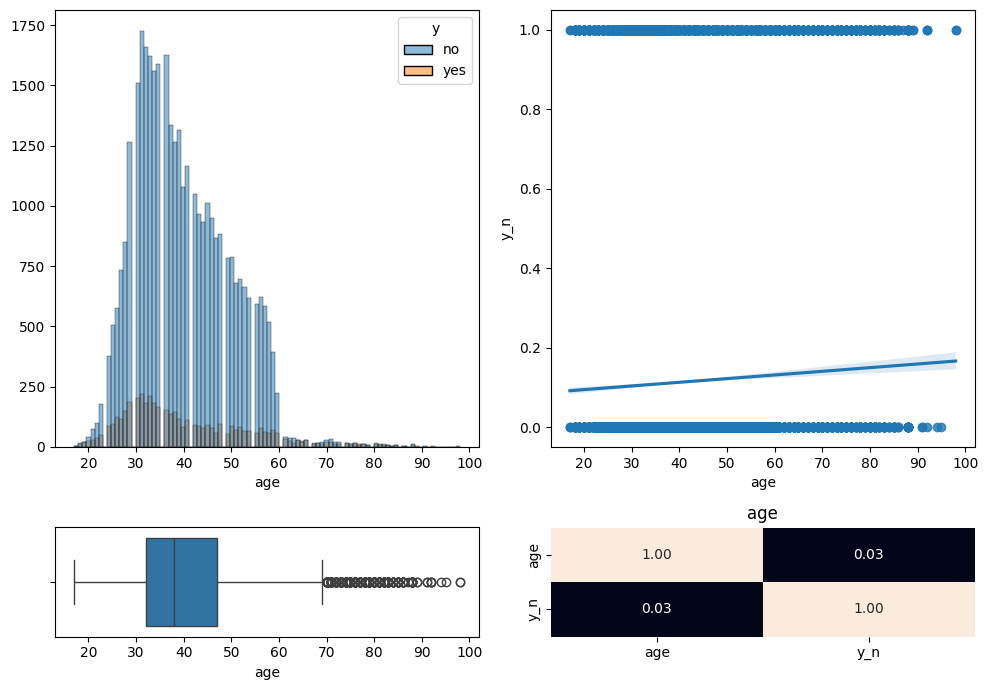

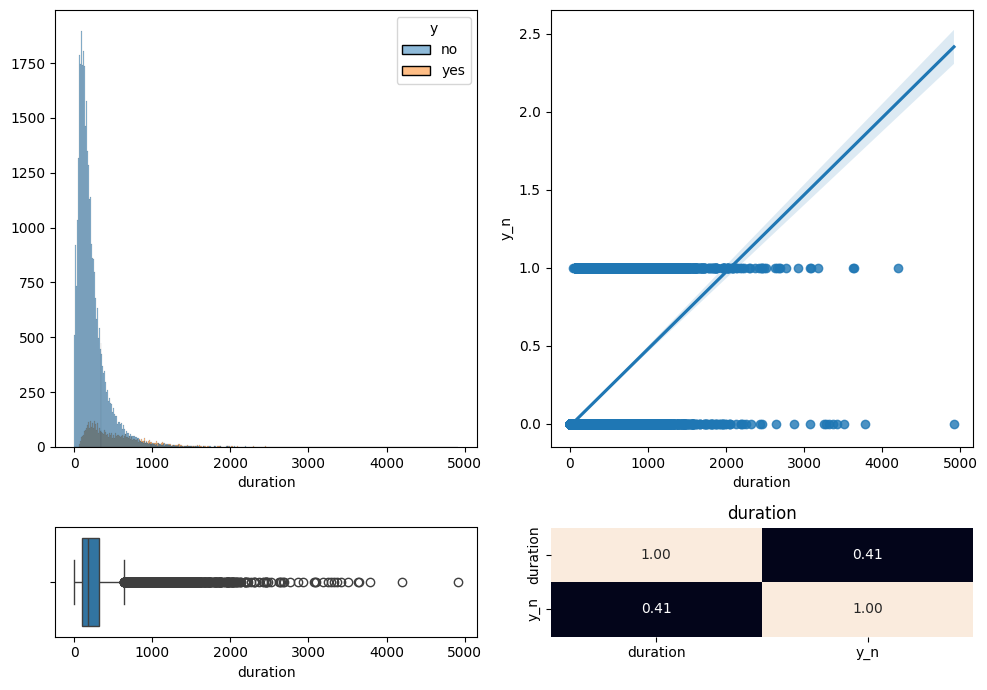

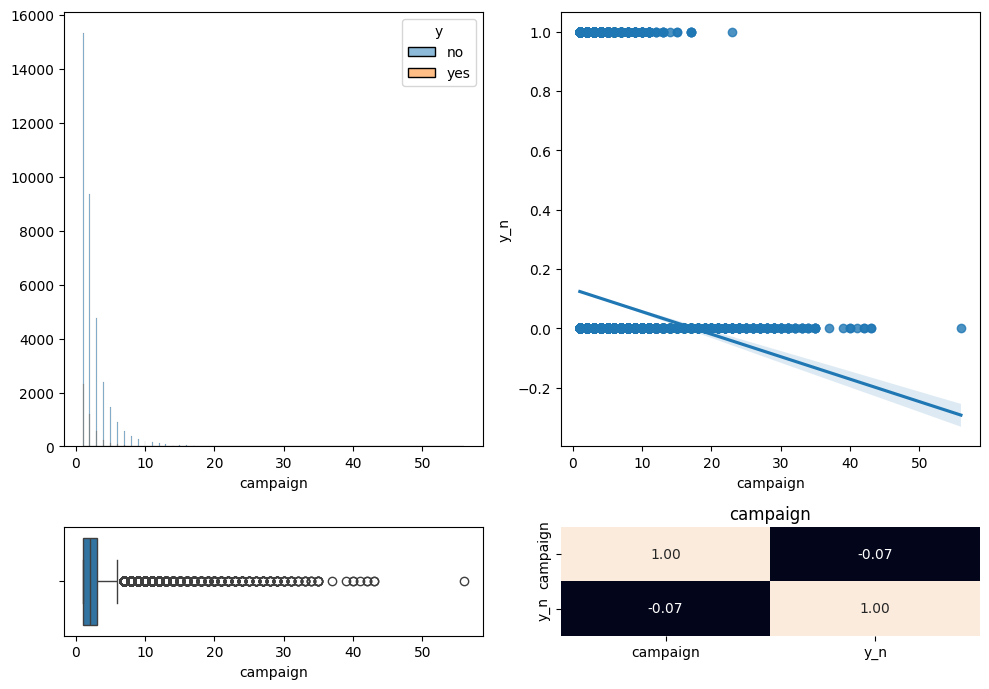

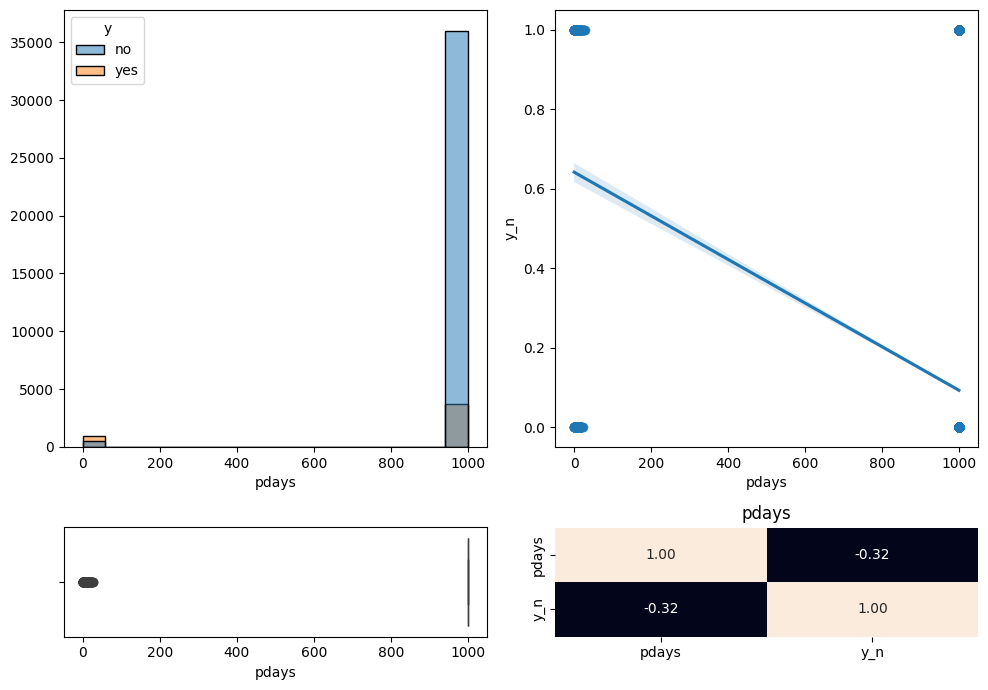

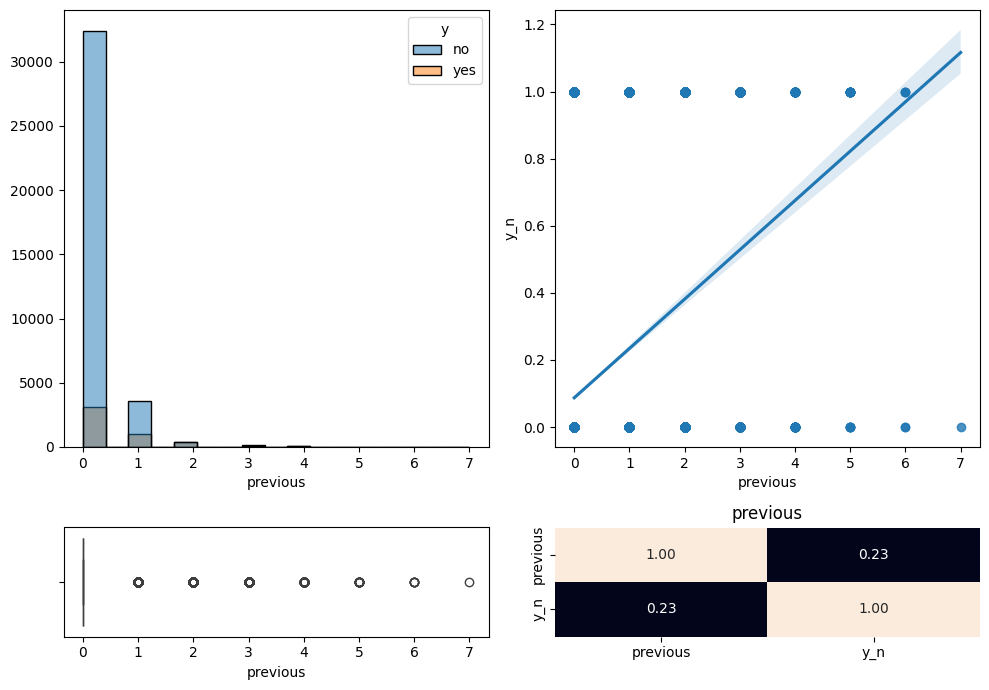

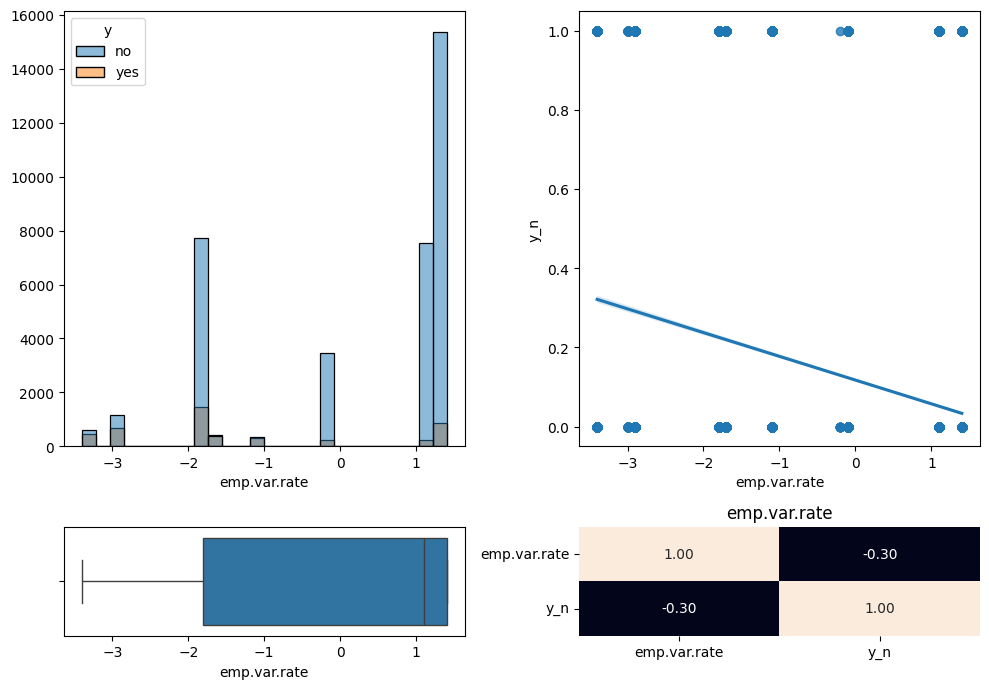

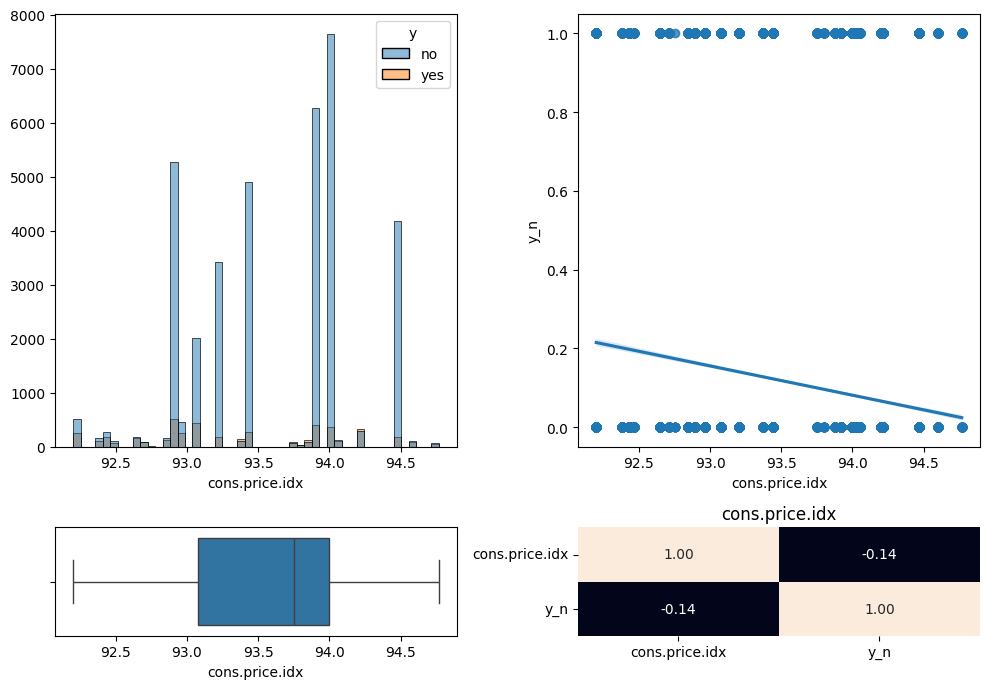

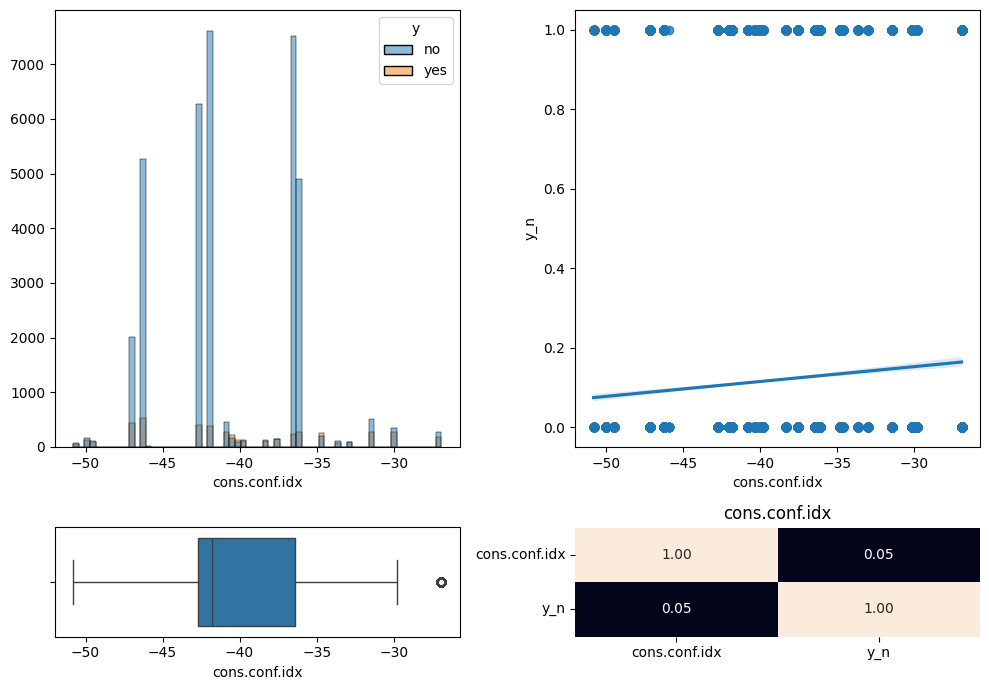

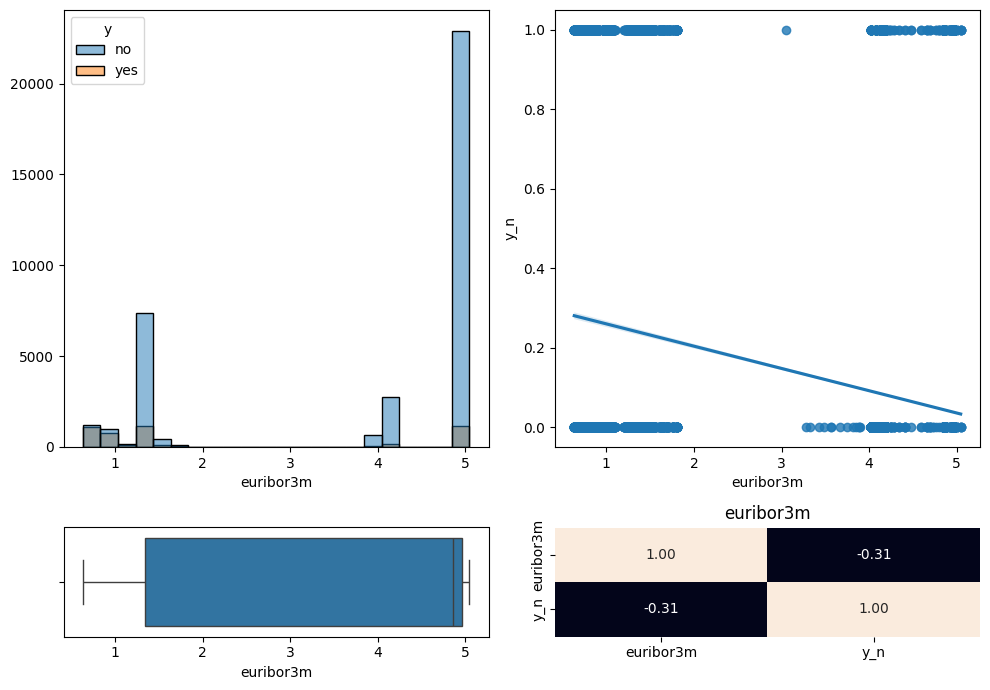

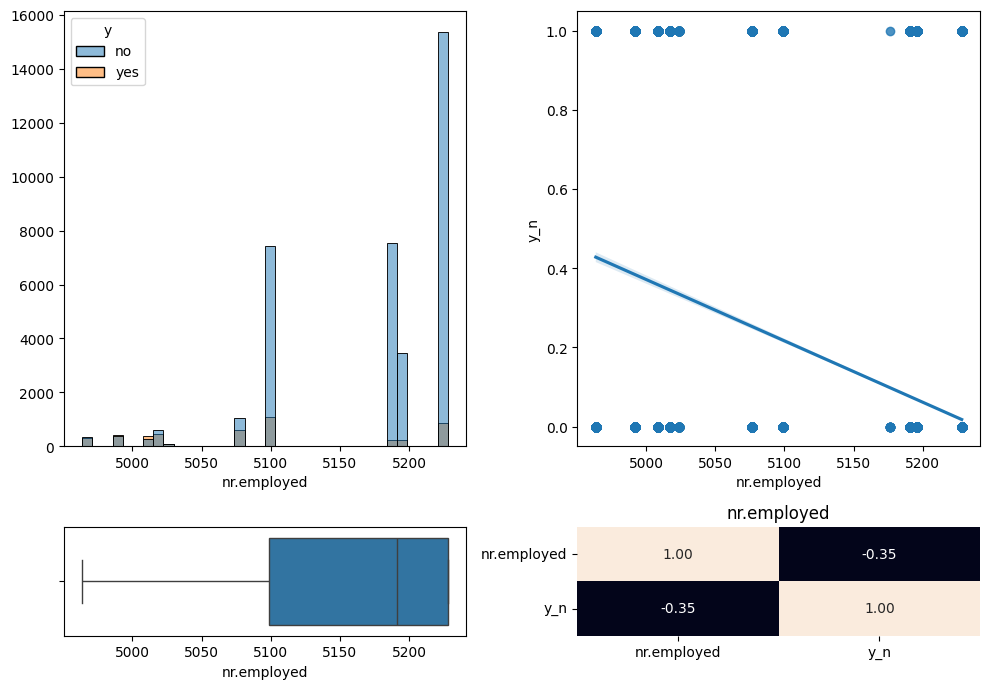

In [10]:
for i in range(len(num_vars)):
    fig, axis = plt.subplots(2, 2, figsize = (10,7),gridspec_kw={'height_ratios': [4, 1]})
    var=num_vars[i]
    sns.histplot(ax = axis[0,0], data = data, x = var,hue="y").set(ylabel = None)
    plt.title(var)
    sns.boxplot(ax = axis[1,0], data = data, x = var)
    sns.regplot(data = data, x = var, y = "y_n",ax=axis[0,1])
    sns.heatmap(data[[var, "y_n"]].corr(), annot = True, fmt = ".2f", cbar = False,ax=axis[1,1])
    plt.tight_layout()
    plt.show()


#sns.histplot(ax = axis[0, 0], data = data, x = "host_id").set(ylabel = None)
#sns.boxplot(ax = axis[1, 0], data = data, x = "calculated_host_listings_count")
#sns.heatmap(data[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")
#sns.countplot(ax=axis[1], data = data, x = "neighbourhood_group", hue = "room_type")

## Ajustar el layout
#plt.tight_layout()

## Mostrar el plot
#plt.show()


Como vemos en los gráficos, y teniendo en cuenta la correlación con las variables numricas, las variables que podríamos decir que tienen mayor impacto en la adquisicion serían: 

* duration: esta variable tiene muchos atípicos, habría que limpiarl.
* pdays (de manera inversa): los datos se concentran en 1 sólo valor, tendríamos que ver si es significativo con estos datos.
* previous
* emp.var.rate (de manera inversa)
* euribor3m (de manera inversa)
* nr.employed (de manera inversa)

Nota: estos tres últimos indicadores, unicamente nos podrían ayudar a saber en qué momento macroeconómico podemos lanzar una campaña y ver el impacto general, pero no nos sirve para ir a nivel cliente.

**Análisis de variables categóricas**

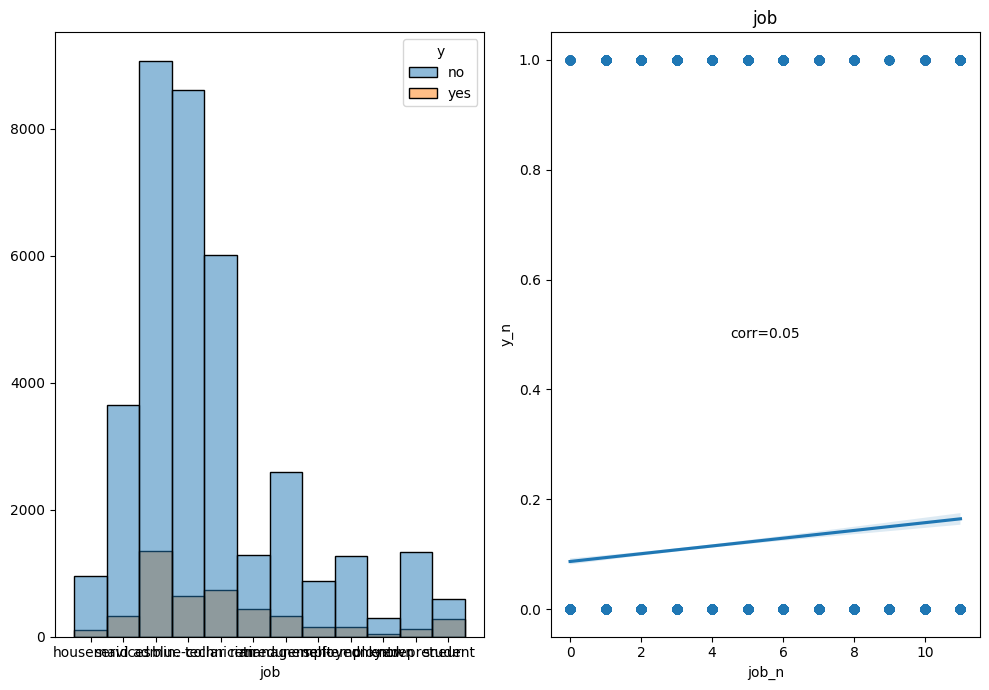

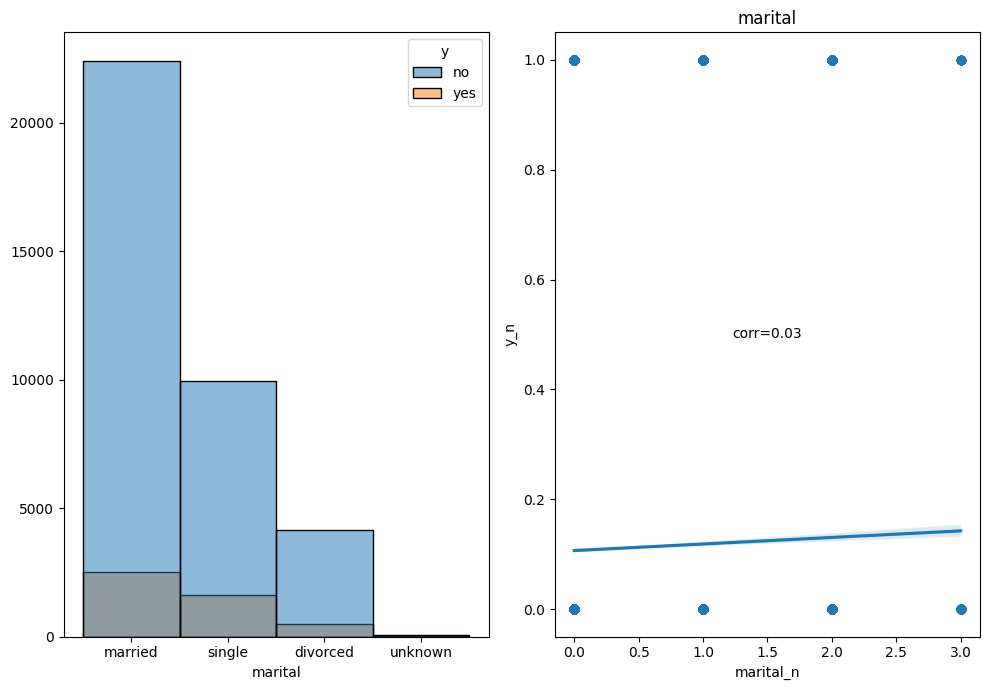

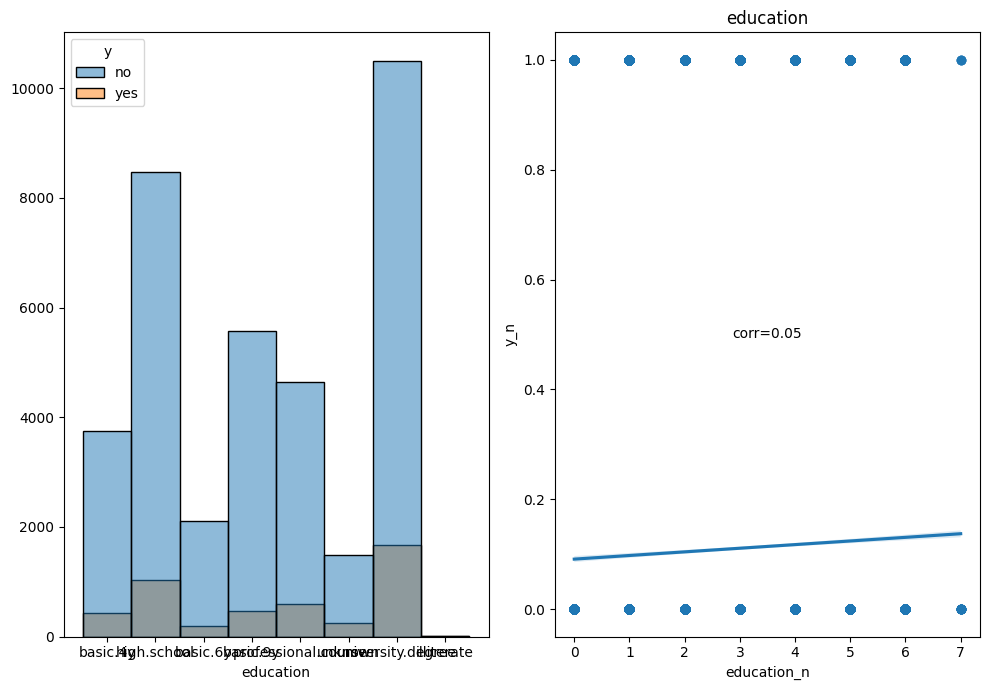

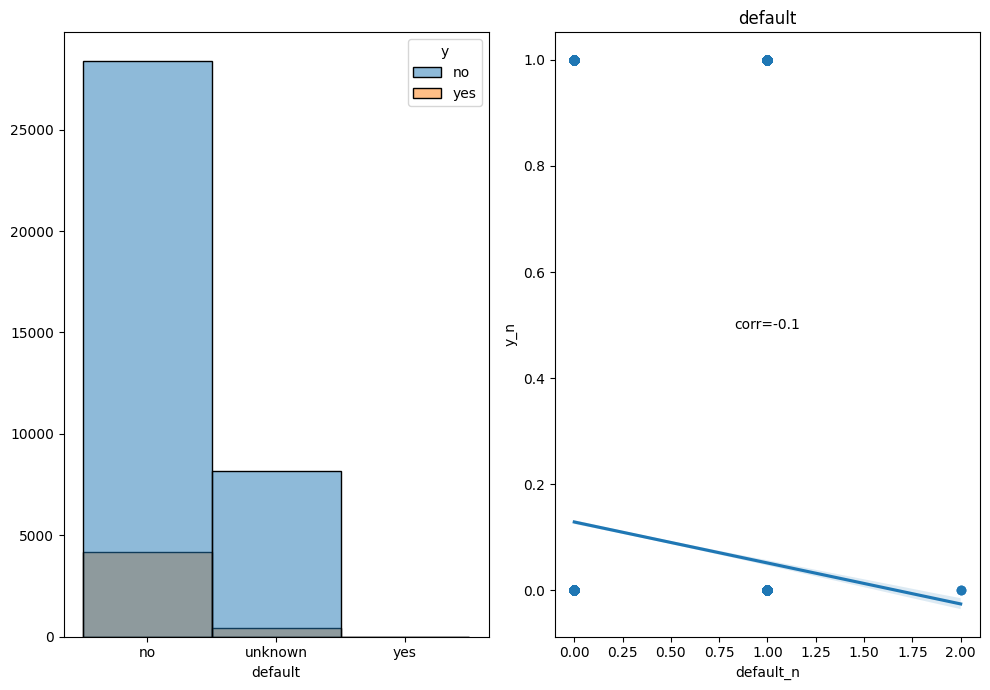

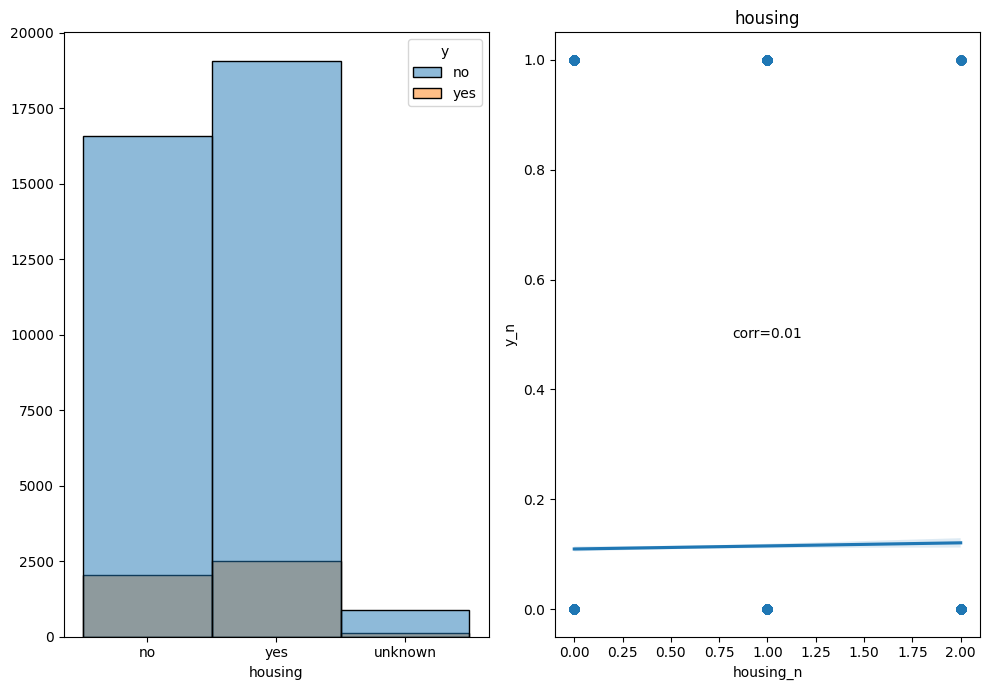

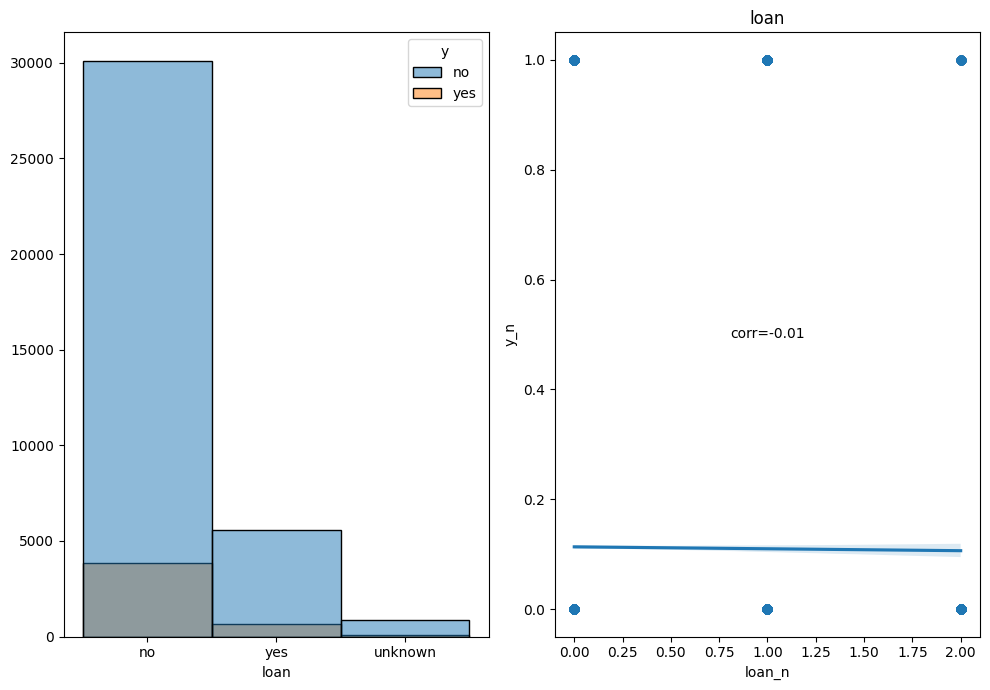

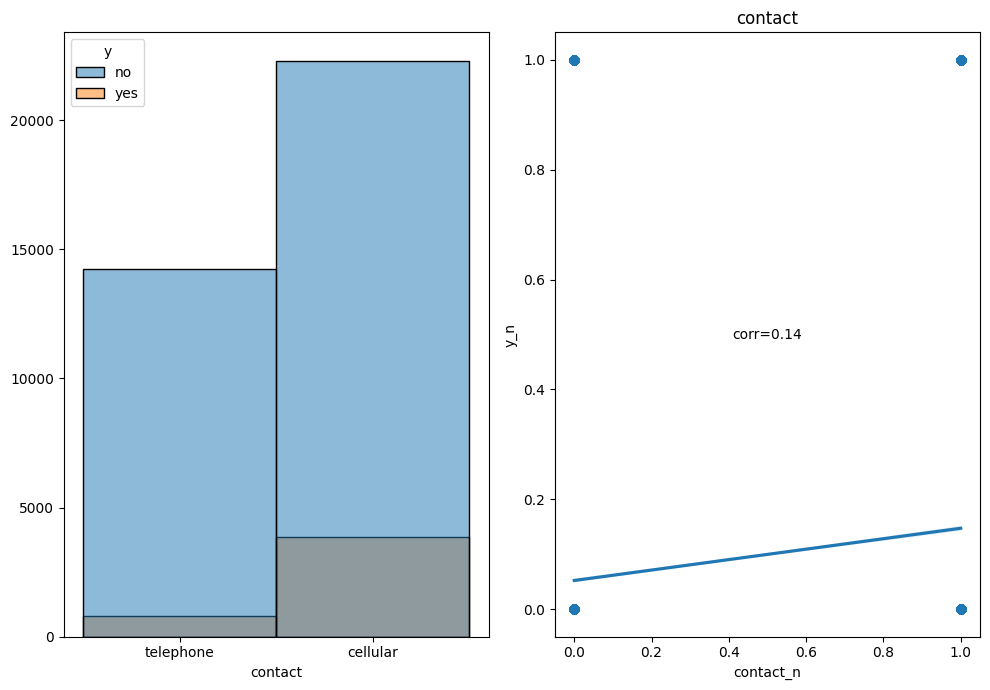

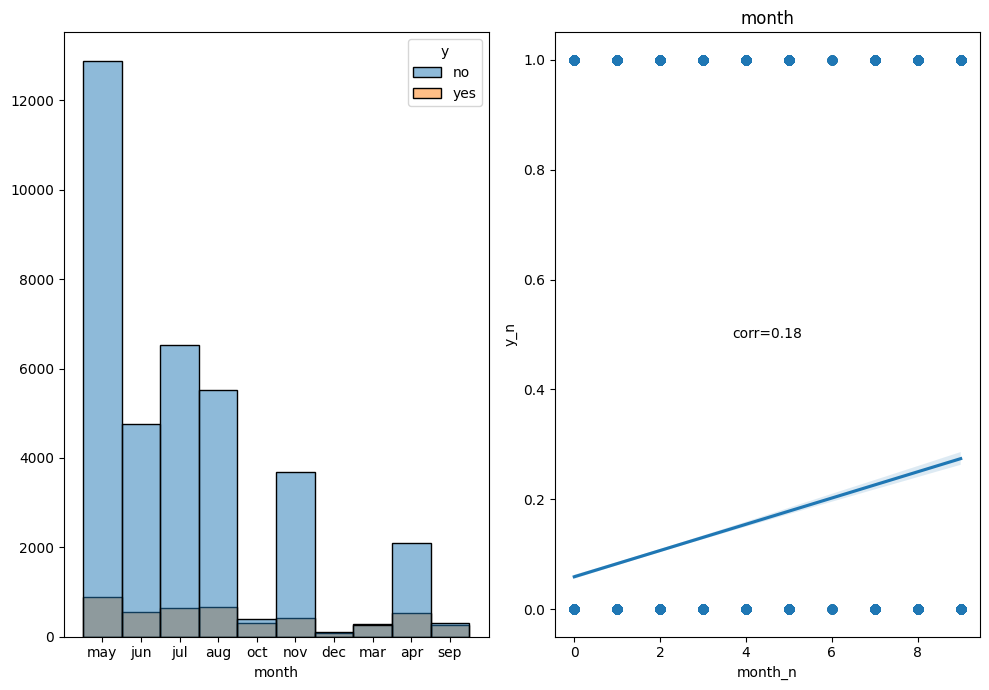

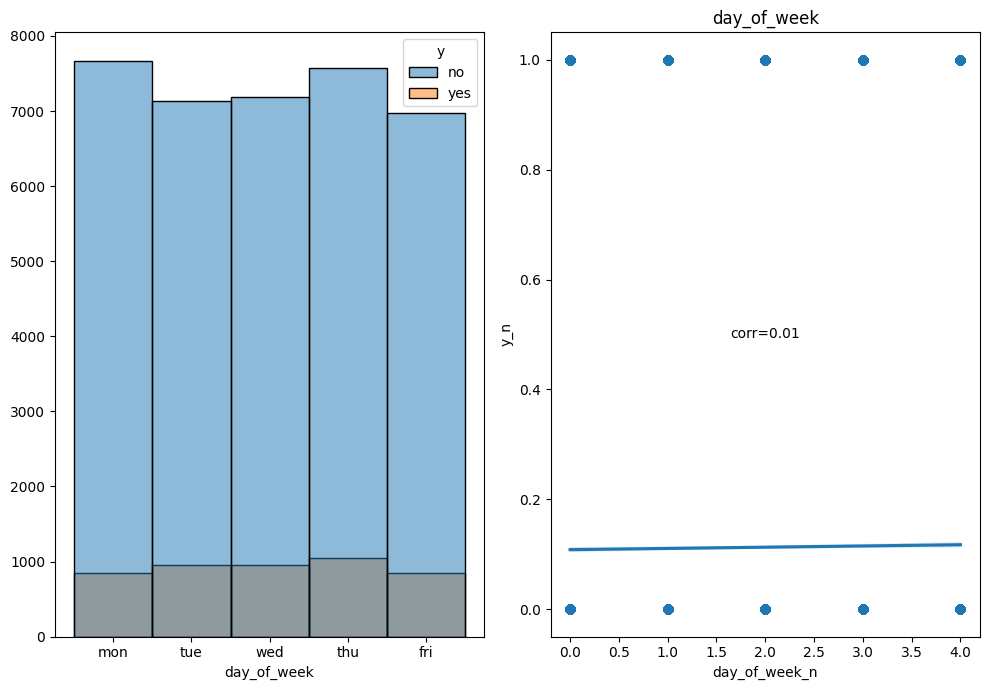

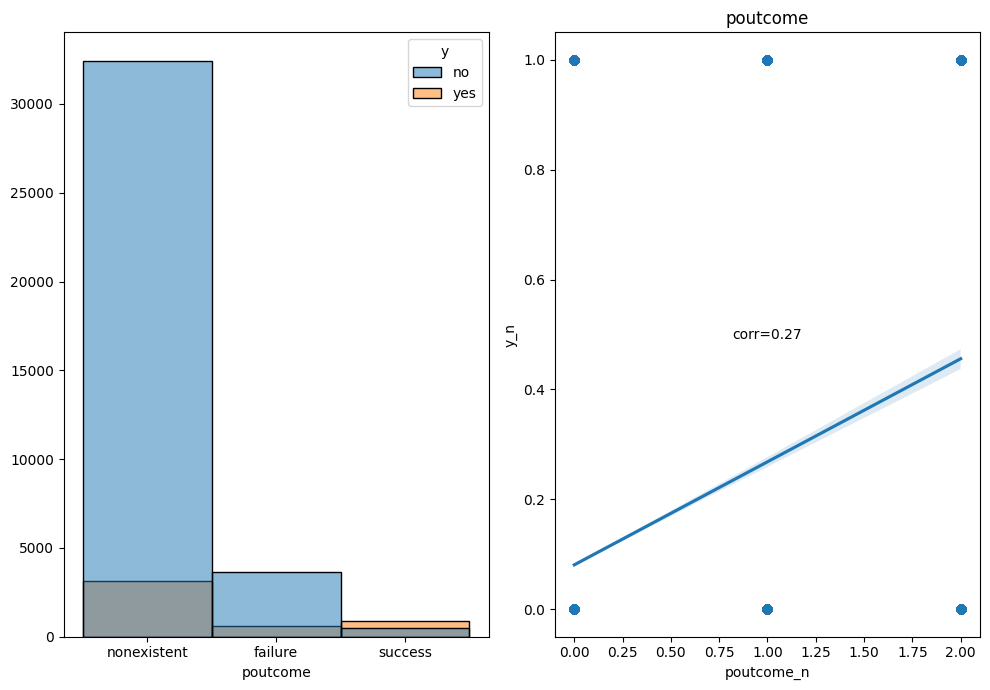

In [11]:
for i in range(len(cat_vars)-1):
    fig, axis = plt.subplots(1, 2, figsize = (10,7))
    var=cat_vars[i]
    var2=cat_vars_trans[i]
    sns.histplot( data = data, x = var,hue="y", ax=axis[0]).set(ylabel = None)
    plt.title(var)
    cor=round(data[[var2, "y_n"]].corr().loc[var2, "y_n"],2)
    max=data[var2].max()/2
    sns.regplot(data = data, x = var2, y = "y_n",ax=axis[1]).text(max,0.5,f"corr={cor}",horizontalalignment='center', verticalalignment='center')
    
    #sns.boxplot(ax = axis[1], data = data, x = var)
    plt.tight_layout()
    plt.show()

En el caso de las categóricas, a nivel correlación parece que tienen impacto las variables **month** (habría que refactorizar para ordenar los datos y ver en qué meses es más eficaz la campaña) y **poutcome** que nos indica el resultado de la última campaña de marketing, cuando fue éxito hay más probabilidades de que en esta campaña lo sea también.

**Separamos la población en muestra de entrenamiento y test**

In [12]:

X = data_n.drop("y_n", axis = 1)
y = data_n["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
12348,29,286,3,999,0,1.4,93.918,-42.7,4.959,5228.1,10,0,2,0,1,1,0,2,4,0
8565,50,178,6,999,0,1.4,94.465,-41.8,4.864,5228.1,2,1,6,0,0,0,0,1,2,0
21424,29,103,4,999,0,1.4,93.444,-36.1,4.963,5228.1,2,1,6,0,0,0,1,3,1,0
3316,35,135,1,999,0,1.1,93.994,-36.4,4.860,5191.0,2,1,6,0,0,0,0,0,3,0
33246,40,418,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,3,1,1,1,0,0,1,0,1,0


**Normalizamos**

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

cols=data_n.columns.drop("y_n")
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = cols)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = cols)

round(X_train_norm.describe(),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
count,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.21,-1.00,-0.57,-5.14,-0.35,-2.22,-2.38,-2.22,-1.72,-2.81,-1.50,-0.73,-1.50,-0.51,-1.06,-0.44,-1.32,-0.93,-1.40,-0.37
25%,-0.77,-0.60,-0.57,0.20,-0.35,-1.20,-0.87,-0.47,-1.31,-0.94,-0.68,-0.73,-1.04,-0.51,-1.06,-0.44,-1.32,-0.93,-0.69,-0.37
50%,-0.20,-0.31,-0.21,0.20,-0.35,0.65,0.30,-0.28,0.71,0.33,-0.27,-0.73,-0.12,-0.51,0.79,-0.44,0.76,-0.10,0.01,-0.37
75%,0.67,0.24,0.15,0.20,-0.35,0.84,0.72,0.89,0.77,0.84,0.14,0.70,1.25,-0.51,0.79,-0.44,0.76,0.31,0.72,-0.37
max,5.56,18.06,19.19,0.20,13.82,0.84,2.06,2.94,0.82,0.84,3.01,3.56,1.71,4.42,2.64,3.94,0.76,2.78,1.43,4.02


**Selección de características**

Tenemos 21 columnas, por tanto, vamos a quedarnos con 7 (1/3) para probar

In [14]:

selection_model_f = SelectKBest(f_classif, k = 7)
selection_model_f.fit(X_train, y_train)
ix = selection_model_f.get_support()
X_train_sel_f = pd.DataFrame(selection_model_f.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel_f = pd.DataFrame(selection_model_f.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel_f.columns

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'poutcome_n'],
      dtype='object')

Vamos a ver si con la prueba chi2 nos saldrían las mismas características, para ello, el escalado debe ser min-max porque no puede tener valores negativos.

In [15]:
scalerX = MinMaxScaler()
scalerX.fit(X_train)

cols=data_n.columns.drop("y_n")
X_train_minmax = scalerX.transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns = cols)

X_test_minmax = scalerX.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns = cols)

round(X_train_minmax.describe(),2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n
count,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00,32940.0,32940.00,32940.00,32940.00,32940.00,32940.00,32940.00
mean,0.28,0.05,0.03,0.96,0.02,0.73,0.54,0.43,0.68,0.77,0.33,0.17,0.47,0.1,0.29,0.10,0.63,0.25,0.49,0.08
std,0.13,0.05,0.05,0.19,0.07,0.33,0.23,0.19,0.39,0.27,0.22,0.23,0.31,0.2,0.27,0.23,0.48,0.27,0.35,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.02,0.00,1.00,0.00,0.33,0.34,0.34,0.16,0.51,0.18,0.00,0.14,0.0,0.00,0.00,0.00,0.00,0.25,0.00
50%,0.26,0.04,0.02,1.00,0.00,0.94,0.60,0.38,0.96,0.86,0.27,0.00,0.43,0.0,0.50,0.00,1.00,0.22,0.50,0.00
75%,0.37,0.06,0.04,1.00,0.00,1.00,0.70,0.60,0.98,1.00,0.36,0.33,0.86,0.0,0.50,0.00,1.00,0.33,0.75,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00


In [16]:
selection_model_x = SelectKBest(chi2, k = 7)
selection_model_x.fit(X_train_minmax, y_train)
ix = selection_model_x.get_support()
X_train_sel_x = pd.DataFrame(selection_model_x.transform(X_train_minmax), columns = X_train_minmax.columns.values[ix])
X_test_sel_x = pd.DataFrame(selection_model_x.transform(X_test_minmax), columns = X_test_minmax.columns.values[ix])

X_train_sel_x.columns

Index(['duration', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed',
       'month_n', 'poutcome_n'],
      dtype='object')

En los dos casos coinciden: **duration**,  **previous**, **emp.var.rate**, **euribor3m**, **nr.employed** y **poutcome_n**

Y para añadir tendríamos **pdays** y **month_n**.

Como hemos visto, **pdays** tiene poca muestra para los valores más cercanos, por tanto, nos quedamos con **month_n** que, además nos va a ayudar a la hora de planificar las campañas, o bien podemos incluir ambas para ver las métricas cómo varían.

Con estos datos, yo haría un modelo para prever el grado de contratación general de la campaña según el momento en el que se haga, y posteriormente podríamos afinarlo teniendo en cuenta las variables a nivel cliente. De esta manera si tenemos una base de datos externa que no contenga información de cliente, podríamos saber la tasa de acierto igualmente.

Sin embargo, para el ejercicio lo vamos a hacer con todas las variables que han salido significativas: **duration**,  **previous**, **emp.var.rate**, **euribor3m**, **nr.employed**, **poutcome_n**, **pdays** y **month_n**

Guardamos los datos separados

In [17]:
X_train_minmax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32940 entries, 12348 to 15798
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32940 non-null  float64
 1   duration        32940 non-null  float64
 2   campaign        32940 non-null  float64
 3   pdays           32940 non-null  float64
 4   previous        32940 non-null  float64
 5   emp.var.rate    32940 non-null  float64
 6   cons.price.idx  32940 non-null  float64
 7   cons.conf.idx   32940 non-null  float64
 8   euribor3m       32940 non-null  float64
 9   nr.employed     32940 non-null  float64
 10  job_n           32940 non-null  float64
 11  marital_n       32940 non-null  float64
 12  education_n     32940 non-null  float64
 13  default_n       32940 non-null  float64
 14  housing_n       32940 non-null  float64
 15  loan_n          32940 non-null  float64
 16  contact_n       32940 non-null  float64
 17  month_n         32940 non-null  

In [23]:

X_train_sel=X_train_sel_x
X_test_sel=X_test_sel_x

#Antes de añadir la variable pdays, vamos a reiniciar los índices para evitar nulos
X_train_sel.reset_index(drop=True, inplace=True)
X_test_sel.reset_index(drop=True, inplace=True)
X_train_minmax.reset_index(drop=True, inplace=True)
X_test_minmax.reset_index(drop=True, inplace=True)

#Añadimos la variable pdays obtenida con el método f, transformada con minmax
X_train_sel["pdays"]=X_train_minmax["pdays"]
X_test_sel["pdays"]=X_test_minmax["pdays"]

#Añadimos la variable objetivo
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

X_train_sel.to_csv("/workspaces/Isa-machine-learning-algorithm/src/clean_bank_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Isa-machine-learning-algorithm/src/clean_bank_test.csv", index=False)

In [24]:
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32940 entries, 0 to 32939
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration      32940 non-null  float64
 1   previous      32940 non-null  float64
 2   emp.var.rate  32940 non-null  float64
 3   euribor3m     32940 non-null  float64
 4   nr.employed   32940 non-null  float64
 5   month_n       32940 non-null  float64
 6   poutcome_n    32940 non-null  float64
 7   pdays         32940 non-null  float64
 8   y             32940 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 2.3 MB


**Vamos con el modelo**

In [25]:
train_data = pd.read_csv("/workspaces/Isa-machine-learning-algorithm/src/clean_bank_train.csv")
test_data = pd.read_csv("/workspaces/Isa-machine-learning-algorithm/src/clean_bank_test.csv")

train_data.head()
test_data.head()

#dividimos las predictoras
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

**1- Inicializamos y entrenamos el modelo**

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**2- Predicciones**

In [42]:
y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame({'y_pred': y_pred})

print("Accuracy:",accuracy_score(y_test, y_pred))
print(y_pred_df.groupby(y_pred).count())

Accuracy: 0.8997085964060223
   y_pred
0    7725
1     511


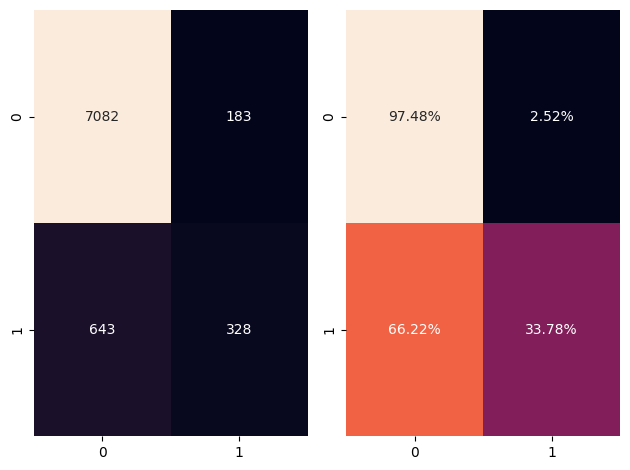

In [51]:
#Matriz de confusion
bank_cm = confusion_matrix(y_test, y_pred)
row_totals = bank_cm.sum(axis=1, keepdims=True)
cm_percent = bank_cm / row_totals

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_cm)

# Calcular la matriz de porcentajes relativos

fig, axis= plt.subplots(1,2)
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False,ax=axis[0])
sns.heatmap(cm_percent, annot=True, fmt=".2%", cbar=False,ax=axis[1])

plt.tight_layout()

plt.show()

Aunque tenemos un **89.9% de accuracy**, en la matriz de confusión vemos que el acierto que nosotros buscamos (**verdaderos positivos**) es de un **33.78%**

**Veamos si podemos optimizar el modelo con la optimización de hiperparámetros**

In [54]:
# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)



In [55]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': None, 'solver': 'sag'}


In [59]:
model_grid = LogisticRegression(penalty = grid.best_params_["penalty"], C = grid.best_params_["C"], solver = grid.best_params_["solver"])
model_grid.fit(X_train, y_train)
y_pred2 = model_grid.predict(X_test)

grid_accuracy2 = accuracy_score(y_test, y_pred2)


0.9021369596891695


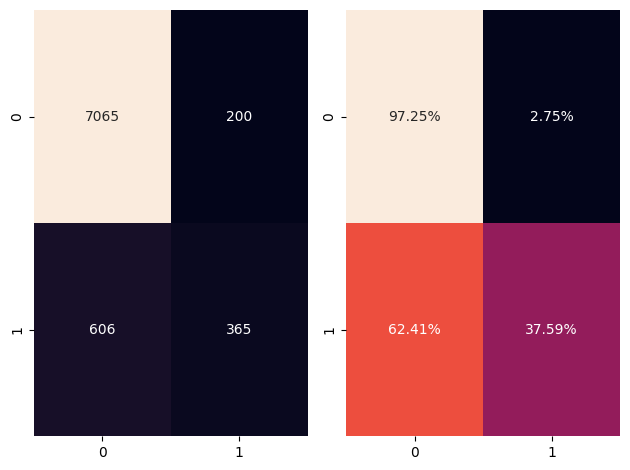

In [60]:
print(grid_accuracy2)
#Matriz de confusion
bank_cm2 = confusion_matrix(y_test, y_pred2)
row_totals2 = bank_cm2.sum(axis=1, keepdims=True)
cm_percent2 = bank_cm2 / row_totals2

# Dibujaremos esta matriz para hacerla más visual
cm_df2 = pd.DataFrame(bank_cm2)

# Calcular la matriz de porcentajes relativos

fig, axis= plt.subplots(1,2)
sns.heatmap(cm_df2, annot=True, fmt="d", cbar=False,ax=axis[0])
sns.heatmap(cm_percent2, annot=True, fmt=".2%", cbar=False,ax=axis[1])

plt.tight_layout()

plt.show()

Con los nuevos hiperparámetros, hemos mejorado el **accuracy** en 0.3% de 89.9% a **90.2%**

Además, el acierto de clientes que contratan (**verdaderos positivos**) ha subido de un 33.78% a un **37.59%**, un **+3.81%**

**Vamos a ver con la búsqueda aleatoria de hiperparámetros**

In [62]:
# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [70]:
print(f"Mejores hiperparámetros grid: {grid.best_params_}")
print(f"Mejores hiperparámetros random: {random_search.best_params_}")

Mejores hiperparámetros grid: {'C': 0.1, 'penalty': None, 'solver': 'sag'}
Mejores hiperparámetros random: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10000.0}


In [71]:
random_search.best_params_["penalty"]

'l2'

In [72]:
random_search.fit(X_train, y_train)

#print(f"Mejores hiperparámetros: {random_search.best_params_}")

model_random_search = LogisticRegression(penalty = random_search.best_params_["penalty"], C = random_search.best_params_["C"], solver = random_search.best_params_["solver"])
model_random_search.fit(X_train, y_train)
y_pred3 = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred3)


0.9021369596891695


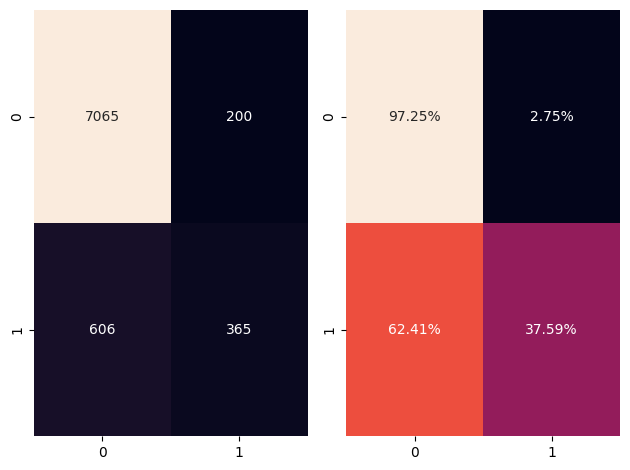

In [73]:
print(random_search_accuracy)
#Matriz de confusion
bank_cm3 = confusion_matrix(y_test, y_pred3)
row_totals3 = bank_cm3.sum(axis=1, keepdims=True)
cm_percent3 = bank_cm3 / row_totals3

# Dibujaremos esta matriz para hacerla más visual
cm_df3 = pd.DataFrame(bank_cm3)

# Calcular la matriz de porcentajes relativos

fig, axis= plt.subplots(1,2)
sns.heatmap(cm_df3, annot=True, fmt="d", cbar=False,ax=axis[0])
sns.heatmap(cm_percent3, annot=True, fmt=".2%", cbar=False,ax=axis[1])

plt.tight_layout()

plt.show()

Como vemos, arroja el mismo nivel de precisión que la estrategia anterior. Esto quiere decir que con los medios e hiperparámetros que hemos intentado optimizar nos encontramos en un máximo local, esto es, que tendríamos que repetir la estrategia de optimización incluyendo otros hiperparámetros para mejorar los resultados del modelo, ya que solo jugando con el penalty, C y solver no vamos a mejorar el modelo más de lo que ya está.